In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import icecream as ic
import os
from cycler import cycler

In [3]:
## Matplotlib Settings

n = 15
c = plt.get_cmap("viridis")
colors = c(np.arange(0, c.N))
colors = [c(1.*i/n) for i in range(n)]
plt.rcParams["axes.prop_cycle"] = cycler("color", colors)

# tableauの結果
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E',
                                                 '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False


In [25]:
dir_path = '/home/mbpl/morizane/analysis_sensitivity/results'
for pos in [1]:
    for rot in [5, 10, 15]:
        globals()[f'pos{pos}_rot{rot}'] = pd.read_excel(os.path.join(dir_path, f'sensitivity_indices_pos_1.0_rot_{rot}.0_Salib.xlsx'))


In [5]:
column_name = 'irrad_volume_tumou_10'

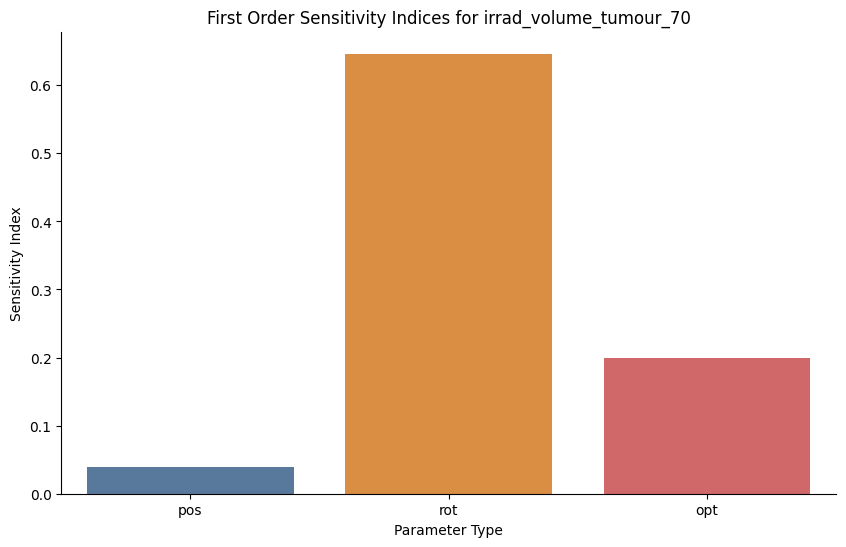

In [7]:
# Define the variables used in the lambda function
func = 'cover_rate_tumour_70'
order = 'first_order'

# Filter the data for 'first_conf' order
filtered_data = pos1_rot5[(pos1_rot5['function'] == func) & (pos1_rot5['order'] == order)]


# Update the boxplot data
boxplot_data = {
    'pos': filtered_data[filtered_data['name'] == 'pos']['value'],
    'rot': filtered_data[filtered_data['name'] == 'rot']['value'],
    'opt': filtered_data[filtered_data['name'] == 'opt']['value']
}


# Convert to DataFrame
boxplot_df = pd.DataFrame(boxplot_data)

# Create the bar plot with error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=boxplot_df)
plt.title('First Order Sensitivity Indices for irrad_volume_tumour_70')
plt.ylabel('Sensitivity Index')
plt.xlabel('Parameter Type')
plt.show()



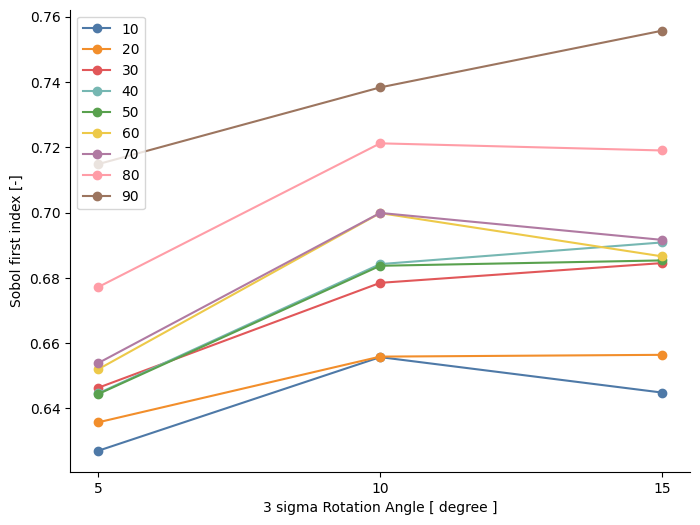

In [18]:
# Extract the values for rot5 and rot10
x = [5, 10, 15]
func = [f'cover_rate_tumour_{i}' for i in range(10, 100, 10)]
y = []

for rot in x:
    values = globals()[f'pos1_rot{rot}'][(globals()[f'pos1_rot{rot}']['function'].isin(func)) & (globals()[f'pos1_rot{rot}']['order'] == 'first_order') & (globals()[f'pos1_rot{rot}']['name'] == 'rot')]['value']
    y.append(values)

func_names = [f.split('_')[-1] for f in func]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', label=func_names)
plt.xlabel('3 sigma Rotation Angle [ degree ]')
plt.ylabel('Sobol first index [-]')
plt.xticks(x)
plt.legend()
plt.show()


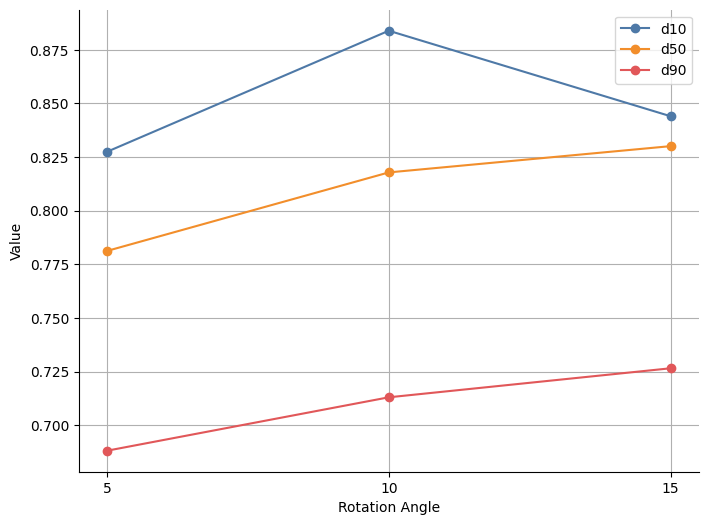

In [38]:
# Extract the values for rot5 and rot10
x = [5, 10, 15]
func = ['dvh_tumour_d10', 'dvh_tumour_d50', 'dvh_tumour_d90']
values_rot5 = pos1_rot5[(pos1_rot5['function'].isin(func)) & (pos1_rot5['order'] == 'first_order') & (pos1_rot5['name'] == 'rot')]['value'].reset_index(drop=True)
values_rot10 = pos1_rot10[(pos1_rot10['function'].isin(func)) & (pos1_rot10['order'] == 'first_order') & (pos1_rot10['name'] == 'rot')]['value'].reset_index(drop=True)
values_rot15 = pos1_rot15[(pos1_rot15['function'].isin(func)) & (pos1_rot15['order'] == 'first_order') & (pos1_rot15['name'] == 'rot')]['value'].reset_index(drop=True)
y = [values_rot5, values_rot10, values_rot15]

# Create the plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(func):
    label = label.split('_')[-1]
    plt.plot(x, [val[i] for val in y], marker='o', linestyle='-', label=label)
plt.xlabel('Rotation Angle')
plt.ylabel('Value')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.show()